<a href="https://colab.research.google.com/github/KaanErdogdu/7_Bootcamo_Siniflandirma_Problemleri/blob/master/Odev__7_2_Lojistik_Regresyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
titanic = pd.read_csv('titanic_test.csv')
titanic.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [12]:
titanic_ss = pd.read_csv('gender_submission.csv')
titanic_ss.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [14]:
titanic_s=titanic.merge(titanic_ss,on="PassengerId",how="left")
titanic_s.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [16]:
titanic_sss= titanic_s[["Sex","Age","SibSp","Parch","Ticket","Fare","Survived"]]

titanic_s.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [17]:
titanic_sss["kadin_mi"] = pd.get_dummies(titanic_s.Sex, drop_first=True)
titanic_sss.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Sex,Age,SibSp,Parch,Ticket,Fare,Survived,kadin_mi
0,male,34.5,0,0,330911,7.8292,0,1
1,female,47.0,1,0,363272,7.0000,1,0
2,male,62.0,0,0,240276,9.6875,0,1
3,male,27.0,0,0,315154,8.6625,0,1
4,female,22.0,1,1,3101298,12.2875,1,0


In [18]:
titanic_s2=titanic_sss[["kadin_mi","Age","SibSp","Parch","Ticket","Fare","Survived"]]
titanic_s2.head()

,kadin_mi,Age,SibSp,Parch,Ticket,Fare,Survived
0,1,34.5,0,0,330911,7.8292,0
1,0,47.0,1,0,363272,7.0000,1
2,1,62.0,0,0,240276,9.6875,0
3,1,27.0,0,0,315154,8.6625,0
4,0,22.0,1,1,3101298,12.2875,1


In [42]:
titanic_s2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   kadin_mi  418 non-null    uint8  
 1   Age       332 non-null    float64
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Ticket    418 non-null    object 
 5   Fare      417 non-null    float64
 6   Survived  418 non-null    int64  
dtypes: float64(2), int64(3), object(1), uint8(1)
memory usage: 23.3+ KB


In [48]:
titanic_s2.isnull().sum()

kadin_mi     0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Survived     0
dtype: int64

In [49]:
#Age boş ise o satırı sil nasıl yapılıyordu

In [51]:
titanic_s2["Age"].fillna(titanic_s2["Age"].mean(), inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [57]:
titanic_s2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   kadin_mi  418 non-null    uint8  
 1   Age       418 non-null    float64
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Ticket    418 non-null    object 
 5   Fare      417 non-null    float64
 6   Survived  418 non-null    int64  
dtypes: float64(2), int64(3), object(1), uint8(1)
memory usage: 23.3+ KB


In [52]:
#X = titanic_s2[["kadin_mi","Age","Ticket"]]
X = titanic_s2[["Age","Ticket"]]
y = titanic_s2.Survived
print(X[:5])
print(y[:5])

    Age   Ticket
0  34.5   330911
1  47.0   363272
2  62.0   240276
3  27.0   315154
4  22.0  3101298
0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64


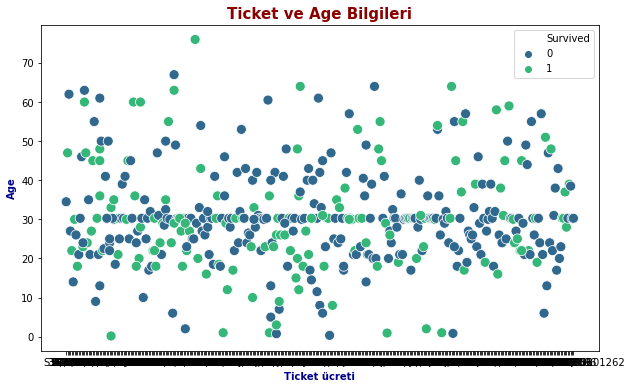

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.scatterplot(X["Ticket"], X["Age"], s=100, hue = y, palette = 'viridis')
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.title("Ticket ve Age Bilgileri", fontdict = baslik_font)
plt.xlabel("Ticket ücreti", fontdict = eksen_font)
plt.ylabel("Age", fontdict = eksen_font)
plt.show()

In [54]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [55]:
from sklearn.model_selection import train_test_split
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

In [56]:
log_reg.fit(X_eğitim, y_eğitim)


ValueError: ignored

In [36]:
egitim_dogruluk = log_reg.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

NotFittedError: ignored

In [ ]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_eğitim, y_eğitim)
egitim_dogruluk = log_reg_mnm.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg_mnm.score(X_test, y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.80


In [ ]:
tahmin_değerleri = np.array([[8,2] , [6,4]])
print(log_reg.predict(tahmin_değerleri))

[2 0]


In [ ]:
C_değerleri = [0.001,0.01,0.1,1,10,100, 1000]
dogruluk_df = pd.DataFrame(columns = ['C_Değeri','Doğruluk'])

dogruluk_değerleri = pd.DataFrame(columns=['C Değeri', 'Eğitim Doğruluğu', 'Test Doğruluğu'])

for c in C_değerleri:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_eğitim,y_eğitim)
    dogruluk_değerleri = dogruluk_değerleri.append({'C Değeri': c,
                                                    'Eğitim Doğruluğu' : lr.score(X_eğitim, y_eğitim),
                                                    'Test Doğruluğu': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(dogruluk_değerleri)  

,C Değeri,Eğitim Doğruluğu,Test Doğruluğu
0,0.001,0.358333,0.233333
1,0.010,0.750000,0.766667
2,0.100,0.775000,0.800000
3,1.000,0.800000,0.800000
4,10.000,0.808333,0.800000
5,100.000,0.808333,0.800000
6,1000.000,0.808333,0.800000
